In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
Data = pd.read_csv("C:\\Users\\Athena\\Desktop\\Projects\\Research\\SolarStudy\\GridInfo.csv")

In [6]:
Data.head()

,Unnamed: 0,Location,"(1,1) Height","(1,2) Height","(1,3) Height","(2,1) Height","(2,2) Height","(2,3) Height","(3,1) Height","(3,2) Height",...,Street_maximum,Street_minimum,Street_median,Street_25,Street_75,AveragePlots,TotalAverage,Classes,BinaryClasses,TenClasses
0,0,0,69.0,63.0,57.0,51.0,44.0,38.0,32.0,26.0,...,1329,435,855,747,1027,882,887,Medium,High,5
1,1,0,69.0,63.0,57.0,51.0,44.0,38.0,32.0,26.0,...,1323,339,864,753,1017,819,857,Low,Low,0
2,2,0,69.0,63.0,57.0,51.0,44.0,38.0,32.0,26.0,...,1329,328,842,719,1011,858,866,Medium,Low,4
3,3,0,69.0,63.0,57.0,51.0,44.0,38.0,32.0,26.0,...,1329,354,863,739,1044,817,855,Low,Low,0
4,4,0,69.0,63.0,57.0,51.0,44.0,38.0,32.0,26.0,...,1323,410,853,738,1018,848,867,Medium,Low,3


In [53]:
##Preprocess data
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

#Split into features and label
X = Data.iloc[:,:70]
y_biClass = Data.BinaryClasses
y_triClass = Data.Classes
y_tenClass = Data.TenClasses

##Scale data and label categorical features
scaler = StandardScaler()
labeler = LabelEncoder()
X_temp = scaler.fit_transform(X.drop("Location", axis=1))
X = np.concatenate((X.Location.values.reshape(-1,1), X_temp), axis=1)
y_biClass = labeler.fit_transform(y_biClass)
y_triClass = labeler.fit_transform(y_triClass)
y_tenClass = labeler.fit_transform(y_tenClass)

##Binary Classification split
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X, y_biClass, test_size=0.2)
X_train_tri, X_test_tri, y_train_tri, y_test_tri = train_test_split(X, y_triClass, test_size=0.2)
X_train_ten, X_test_ten, y_train_ten, y_test_ten = train_test_split(X, y_tenClass, test_size=0.2)

In [54]:
#Simple Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

#Two classes
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train_b, y_train_b)
y_pred_b = classifier.predict(X_test_b)
cm_b = confusion_matrix(y_test_b, y_pred_b)
print("Binary classification results\n" )
print("Confusion matrix:\n")
print(cm_b, "\n")
print("Classification Report:\n")
print(classification_report(y_test_b, y_pred_b, target_names=['Low', 'High']))

#Three classes
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train_tri, y_train_tri)
y_pred_tri = classifier.predict(X_test_tri)
cm_tri = confusion_matrix(y_test_tri, y_pred_tri)
print("Three-class classification results\n" )
print("Confusion matrix:\n")
print(cm_tri, "\n")
print("Classification Report:\n")
print(classification_report(y_test_tri, y_pred_tri, target_names=['Low', 'Medium','High']))

#Ten classes
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train_ten, y_train_ten)
y_pred_ten = classifier.predict(X_test_ten)
cm_ten = confusion_matrix(y_test_ten, y_pred_ten)
print("Ten-class classification results\n" )
print("Confusion matrix:\n")
print(cm_ten, "\n")
print("Classification Report:\n")
print(classification_report(y_test_ten, y_pred_ten, 
                            target_names=['0-10%', '10-20%', '20-30%', '30-40%', '40-50%',
                                         '50-60%', '60-70%', '70-80%', '80-90%', '90-100%']))

Binary classification results

Confusion matrix:

[[315   9]
 [  7 321]] 

Classification Report:

             precision    recall  f1-score   support

        Low       0.98      0.97      0.98       324
       High       0.97      0.98      0.98       328

avg / total       0.98      0.98      0.98       652

Three-class classification results

Confusion matrix:

[[222   0   2]
 [  0 224   6]
 [ 31  14 153]] 

Classification Report:

             precision    recall  f1-score   support

        Low       0.88      0.99      0.93       224
     Medium       0.94      0.97      0.96       230
       High       0.95      0.77      0.85       198

avg / total       0.92      0.92      0.92       652

Ten-class classification results

Confusion matrix:

[[120   3   0   0   0   0   0   0   0]
 [ 26  33  13  10   1   2   1   0   0]
 [  0  10  23  16   0   3   0   0   0]
 [  0   0  15  31   5   8   1   0   0]
 [  0   0   7  10  16  24   2   0   1]
 [  0   0   0   0  15  16  30   5   8]
 [  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1428: UserWarning: labels size, 9, does not match size of target_names, 10
  .format(len(labels), len(target_names))


In [123]:
##LightGBM datasets, if needed
import lightgbm as lgb

lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=[0], free_raw_data=False)
lgb_test = lgb.Dataset(X_test, y_test, categorical_feature=[0], free_raw_data=False)

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=2, train_sizes=np.linspace(0.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [196]:
##Sklearn and LightGBM - Round 1
from sklearn.model_selection import GridSearchCV

gbm_R1 = lgb.LGBMClassifier(n_estimators=1000, n_jobs=3)

param_grid = {
    'boosting_type': ['gbdt', 'dart'],
    'objective': ['binary'],
    'metric': ['auc'],
    'num_leaves': [10, 30, 60],
    'learning_rate': [0.01, 0.25, 0.5, 1],
    'feature_fraction': [0.2, 0.5, 0.8],
    'bagging_fraction': [0.2, 0.5, 0.8],
    'bagging_freq': [5, 12, 20],
    'verbose': [1]
}

gbmGrid_R1 = GridSearchCV(estimator=gbm_R1, param_grid=param_grid, cv=5, verbose=0)
gbmGrid_R1.fit(X_train, y_train)

#Print best model and scores on training data set
print("Best model configuration: " , gbmGrid_R1.best_estimator_)
print("Training set accuracy = " , gbmGrid_R1.best_score_)

##Check validation set accuracy
gbmVal_R1 = gbmGrid_R1.best_estimator_.fit(X_train, y_train)
print("Validation classification accuracy = ", gbmVal_R1.score(X_test, y_test))

Best model configuration:  LGBMClassifier(bagging_fraction=0.8, bagging_freq=5, boosting_type='gbdt',
        class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
        learning_rate=0.25, max_depth=-1, metric='auc',
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=1000, n_jobs=3, num_leaves=30, objective='binary',
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=1,
        verbose=1)
Training set accuracy =  0.978732106339
Validation classification accuracy =  0.966871165644


<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

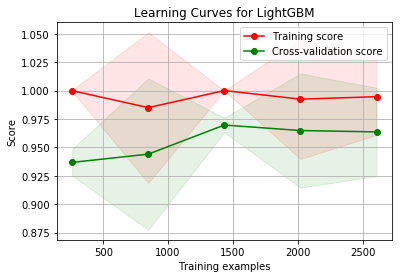

In [197]:
learning_curve(gbmGrid_R1.best_estimator_, X_train, y_train, cv=5)

title = "Learning Curves for LightGBM"
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
estimator = gbmGrid_R1.best_estimator_
plot_learning_curve(estimator, title, X_scaled, y_binary, cv=cv, n_jobs=3)

In [201]:
##Sklearn option - Round 2, focus parameter grid on parameter value ranges identified in Round 1
from sklearn.model_selection import GridSearchCV

gbm_R2 = lgb.LGBMClassifier(n_estimators=1000, n_jobs=3, tree='feature_parallel')

param_grid = {
    'boosting_type': ['dart'], 
    'objective': ['binary'],
    'metric': ['auc'],
    'num_leaves': [20, 30, 40],
    'learning_rate': [0.2, 0.25, 0.3],
    'colsample_bytree': [0.4, 0.5, 0.6],
    'subsample': [0.3, 0.6, 0.9],
    'reg_lambda': [0, 1e-5, 1e-3, 0.1],
    'reg_alpha': [0, 1e-5, 1e-3, 0.1],
    'drop_rate': [0.1, 0.3, 0.5],
    'verbose': [1]
}

gbmGrid_R2 = GridSearchCV(estimator=gbm_R2, param_grid=param_grid, cv=5, verbose=0)
gbmGrid_R2.fit(X_train, y_train)

#Print best model and scores on training data set
print("Best model configuration: " , gbmGrid_R2.best_estimator_)
print("Training set accuracy = " , gbmGrid_R2.best_score_)

##Check validation set accuracy
gbmVal_R2 = gbmGrid_R2.best_estimator_.fit(X_train, y_train)
print("Validation classification accuracy =  ", gbmVal_R2.score(X_test, y_test))

KeyboardInterrupt: 

In [ ]:
learning_curve(gbmGrid_R2.best_estimator_, X_train, y_train, cv=5)

title = "Learning Curves for LightGBM"
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
estimator = gbmGrid_R2.best_estimator_
plot_learning_curve(estimator, title, X_scaled, y_binary, cv=cv, n_jobs=2)

In [ ]:
from sklearn.externals import joblib
joblib.dump(gbmGrid_R1.best_estimator_, 'gbmGrid_R1.pkl', compress = 1)
joblib.dump(gbmGrid_R2.best_estimator_, 'gbmGrid_R2.pkl', compress = 1)